## Homework 3 - Part 1
## Decision Tree and Random forest

In this homework, you will perform classification on the provided datasets using Decision Tree and Random Forest algorithms. 

The first dataset you will be working with contains 2 features. The second dataset contains 50 features. Both of them have a target label which can be 0 or 1.

You will go step by step with the first dataset. <br>
1 - Use a Decision Tree Classifier and observe the model performance.<br>
2 - Use a Random Forest Classifier and observe the model performance.<br>
3 - Use Grid Search to choose the optimal values for hyperparameters and observe the performance of the best model.


For the second dataset, you are required to generate an optimized Random Forest model using what you have learned in the steps mentioned above.

Dataset 1:
train_2features.csv and test_2features.csv are the training set and testing set respecitvely.


Dataset 2:
train_50features.csv and test_50features.csv are the training set and testing set respecitvely.


To obtain a deterministic behavior, keep the random_state in all algorithms fixed to the value given. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import visualize_2d_data

# Dataset 1

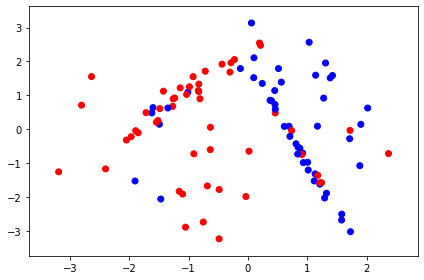

In [2]:
train_df = pd.read_csv("train_2features.csv")
f, ax = visualize_2d_data(train_df)

In [3]:
train_df.head()

,x1,x2,y
0,0.455178,0.727672,1
1,-0.303342,1.684185,0
2,-1.100127,-1.914980,0
3,1.129869,-1.319774,1
4,0.396403,0.836826,1


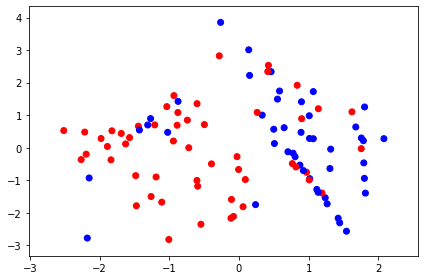

In [4]:
test_df = pd.read_csv("test_2features.csv")
f, ax = visualize_2d_data(test_df)

In [5]:
test_df.head()

,x1,x2,y
0,-1.260875,-1.496315,0
1,1.804029,1.253803,1
2,-1.627030,0.118947,0
3,-1.888437,0.040332,0
4,1.140222,1.199631,0


In [6]:
len(test_df)

100

Q. From the above visualizations, what can you tell about the need for a linear/non-linear model for classification? <br>
Answer: <br>
Classifiers are used to separate the As illustrated above, it's not easy to "seperate" the red dots from blue dots using a "line". While the majority of the dots of the same kind clusters together, there're a few dots (around 10%) cluters with the other dots for both red and blue. So it would be difficult to use classification methods on them. <br>

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [8]:
### Fit the classifier on the training data
clf = DecisionTreeClassifier(random_state=26)
### WRITE CODE HERE ###
train_x = train_df.iloc[:,0:2]
train_y = train_df.iloc[:,2]
clf = clf.fit(train_x, train_y)

In [9]:
### Make predictions on the training data
### WRITE CODE HERE ###
train_y_pred = clf.predict(train_x)
print(pd.Series(train_y_pred).value_counts())

0    51
1    49
dtype: int64


Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [10]:
### WRITE CODE HERE ###
accuracy = accuracy_score(train_y, train_y_pred)
precision = precision_score(train_y, train_y_pred)
recall = recall_score(train_y, train_y_pred)
print('Accuracy: ', accuracy, "; Precision: ", precision, "; Recall:", recall)

Accuracy:  1.0 ; Precision:  1.0 ; Recall: 1.0


In [11]:
### Make predictions on the testing data
### WRITE CODE HERE ###
test_x = test_df.iloc[:,0:2]
test_y = test_df.iloc[:,2]
test_y_pred = clf.predict(test_x)

In [12]:
print(pd.Series(test_y_pred).value_counts())

0    56
1    44
dtype: int64


Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [13]:
### WRITE CODE HERE ###
accuracy1 = accuracy_score(test_y, test_y_pred)
precision1 = precision_score(test_y, test_y_pred)
recall1 = recall_score(test_y, test_y_pred)
print('Accuracy: ', accuracy1, "; Precision: ", precision1, "; Recall:", recall1)

Accuracy:  0.69 ; Precision:  0.6818181818181818 ; Recall: 0.6382978723404256


Q. Plot ROC curve and obtain AUC for test predictions

AUC is  0.6870734644720996


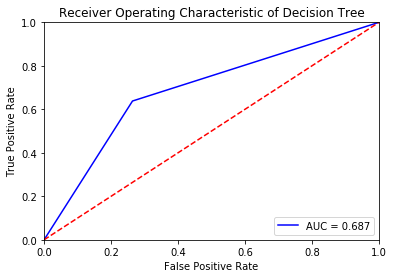

In [14]:
# Plot the ROC curve by giving appropriate names for title and axes. 
### WRITE CODE HERE
from sklearn.metrics import roc_curve, auc
test_y_predprob = clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(np.array(test_y), np.array(test_y_predprob[:,1]), pos_label = 1)
roc_auc = auc(fpr, tpr)
print("AUC is ", roc_auc)
plt.title('Receiver Operating Characteristic of Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance. <br>
Answer: <br>
Bias refers to the errors from wrong assumptions. If the model makes simple assumptions, then it causes errors. In that case, the model is said to have high bias. As a model pays more attention on the training set, the training error reduces. With a high training score (accuracy, precision and recall), the training error is small. So the model has low bias. <br>
Variance refers to the sensitivity to flunctuations of the model. If the model is sensitive to a change the set, say from training to testing, then the model is said to have high variance. As we use the model to predict on the test set, the scores drops largely. Thus, the variance of the model is high. <br>
So the model has low bias and high variance.  

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
### Fit the classifier on the training data
rf = RandomForestClassifier(n_estimators = 10, random_state=26)
### WRITE CODE HERE ###
rf = rf.fit(train_x, train_y)

In [17]:
### Make predictions on the training data
### WRITE CODE HERE ###
train_y_predrf = rf.predict(train_x)

In [18]:
pd.Series(train_y_predrf).value_counts()

0    52
1    48
dtype: int64

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [19]:
### WRITE CODE HERE ###
accuracy_trainrf = accuracy_score(train_y, train_y_predrf)
precision_trainrf = precision_score(train_y, train_y_predrf)
recall_trainrf = recall_score(train_y, train_y_predrf)
print('Accuracy: ', accuracy_trainrf, "; Precision: ", precision_trainrf, "; Recall:", recall_trainrf)

Accuracy:  0.99 ; Precision:  1.0 ; Recall: 0.9795918367346939


In [20]:
### Make predictions on the testing data
### WRITE CODE HERE ###
test_y_predrf = rf.predict(test_x)

Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [21]:
### WRITE CODE HERE ###
accuracyrf = accuracy_score(test_y, test_y_predrf)
precisionrf = precision_score(test_y, test_y_predrf)
recallrf = recall_score(test_y, test_y_predrf)
print('Accuracy: ', accuracyrf, "; Precision: ", precisionrf, "; Recall:", recallrf)

Accuracy:  0.72 ; Precision:  0.7021276595744681 ; Recall: 0.7021276595744681


Q. Plot ROC curve and obtain AUC for the test predictions

AUC is  0.7643516659975913


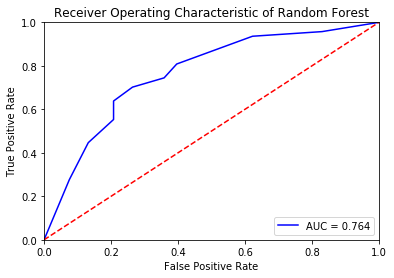

In [22]:
# Plot the ROC curve by giving appropriate names for title and axes. 
### WRITE CODE HERE
test_y_predrf_prob = rf.predict_proba(test_x)
fpr_rf, tpr_rf, threshold_rf = roc_curve(np.array(test_y), np.array(test_y_predrf_prob[:,1]), pos_label = 1)
roc_auc_rf = auc(fpr_rf, tpr_rf)                                                                                          
print("AUC is ", roc_auc_rf)
plt.title('Receiver Operating Characteristic of Random Forest')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.3f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated. <br>
Answer: <br>
The random forest model outperforms the decision tree on all three scores when predicting on the test set. <br>
$\text{Accuracy}_\text{dt train} = 1.0, \; \text{Precision}_\text{dt train} = 1.0, \; \text{Recall}_\text{dt train} = 1.0$ <br>
$\text{Accuracy}_\text{rf train} = 0.99, \; \text{Precision}_\text{rf train} = 1.0, \; \text{Recall}_\text{rf train} \approx 0.980 $ <br>
The scores of random forest model on the training set is smaller than the scores of the decision tree model on the training set. The smaller training error implies larger bias of the model. So the bias of the random forest model is higher than that of the decision tree model. <br>
$\text{Accuracy}_\text{dt test} = 0.69, \; \text{Precision}_\text{dt test} \approx 0.682, \; \text{Recall}_\text{dt test} \approx 0.638$ <br>
$\text{Accuracy}_\text{rf test} = 0.72, \; \text{Precision}_\text{rf test} \approx 0.702, \; \text{Recall}_\text{rf test} \approx 0.702 $ <br>
As discussed, variance describes the sentivity of the model to fluctuations. A smaller change of scores under the testing set in the random forest model implies that the variance is smaller in the random forest model than that in the decision tree model. <br>
$\text{AUC}_{\text{decision tree}} \approx 0.687, \; \text{AUC}_{\text{random forest}} \approx 0.764$ <br>
Larger AUC implies better prediction performance of the model, so the performance of random forest model is better than that of the decision tree. <br>
Typically, random forest is a better model for prediction than decision trees. Random forest consists of multiple trees with random subset of predictors. The "randomness" of random forest makes the trees decorrelated, providing a more complex picture of the relationship among variables and a reduced variance as a result of the randomness. Hence, the model will be more general and less specialized in fiting only the known data. So the prediction performance of random forest is typically better than that of a decision tree. 

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'max_features': [2, 'log2', 'sqrt'],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [5, 7, 10, 100]
}

In [25]:
rf = RandomForestClassifier(random_state=26)

In [26]:
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [27]:
### Fit the training data

### WRITE CODE HERE ###
gridfit = grid_search.fit(X = train_x, y = train_y)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 719 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:   13.3s finished
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Q. Display the parameters of the best model.

In [28]:
### WRITE CODE HERE ###
gridfit.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 7}

Scores on training set
Accuracy:  0.83 ; Precision:  0.8478260869565217 ; Recall: 0.7959183673469388
Scores on testing set
Accuracy:  0.77 ; Precision:  0.74 ; Recall: 0.7872340425531915
AUC is  0.774387796065837


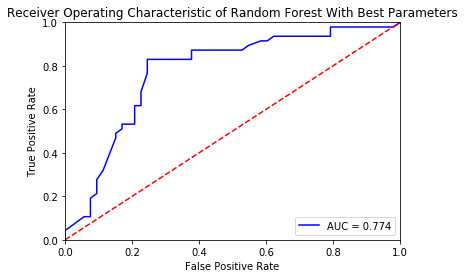

In [29]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the testing set and display accuracy, precision and recall. Plot ROC curve and print AUC.

### WRITE CODE HERE ###
rf_bestparam = RandomForestClassifier(max_depth = 3, max_features = 'log2', min_samples_leaf = 3, min_samples_split = 2, 
                                      n_estimators = 7, random_state=26)
rf_bestparam = rf_bestparam.fit(train_x, train_y)
# Training set
train_y_bestpred = rf_bestparam.predict(train_x)
acc_rftrainbest = accuracy_score(train_y, train_y_bestpred)
precision_rftrainbest = precision_score(train_y, train_y_bestpred)
recall_rftrainbest = recall_score(train_y, train_y_bestpred)
# Testing set
test_y_bestpred = rf_bestparam.predict(test_x)
acc_rf_testbest = accuracy_score(test_y, test_y_bestpred)
pre_rf_testbest = precision_score(test_y, test_y_bestpred)
rec_rf_testbest = recall_score(test_y, test_y_bestpred)
print('Scores on training set')
print('Accuracy: ', acc_rftrainbest, "; Precision: ", precision_rftrainbest, "; Recall:", recall_rftrainbest)
print('Scores on testing set')
print('Accuracy: ', acc_rf_testbest, "; Precision: ", pre_rf_testbest, "; Recall:", rec_rf_testbest)
# AUC
test_y_best_prob = rf_bestparam.predict_proba(test_x)
fpr_best, tpr_best, threshold_best = roc_curve(np.array(test_y), np.array(test_y_best_prob[:,1]), pos_label = 1)
roc_auc_best = auc(fpr_best, tpr_best)
print("AUC is ", roc_auc_best)
plt.title('Receiver Operating Characteristic of Random Forest With Best Parameters')
plt.plot(fpr_best, tpr_best, 'b', label = 'AUC = %0.3f' % roc_auc_best)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Q. How did performing Grid Search impact the performance of the model? Were you able to optimize the hyperparameters? <br>
Answer: <br>
The performance of the second random forest (RF) model is outperforms the performance of the first random forest (RF) model. <br>
$\text{Accuracy}_\text{rf train} = 0.99, \; \text{Precision}_\text{rf train} = 1.0, \; \text{Recall}_\text{rf train} \approx 0.980$ <br>
$\text{Accuracy}_\text{rf best train} = 0.83, \; \text{Precision}_\text{rf best train} \approx 0.848, \; \text{Recall}_\text{rf train} \approx 0.760$ <br>
The three scores (accuracy, precision and recall) on training set are reduced because the maximum depth of the tree (max_depth) is restricted under the best parameters. So the fitted model would be grow without bound to minimize training error. With simplified individual trees, the training scores drop accordingly, and the bias increases. <br>
$\text{Accuracy}_\text{rf test} = 0.72, \; \text{Precision}_\text{rf test} \approx 0.702, \; \text{Recall}_\text{rf test} \approx 0.702$ <br>
$\text{Accuracy}_\text{rf best test} = 0.77, \; \text{Precision}_\text{rf best test} = 0.74, \; \text{Recall}_\text{rf test} \approx 0.787$ <br>
The three scores on the test set are increased, implying the less variability of target function with respect to different sets. Hence, the second RF model has lower variance than the first one. <br> 
$\text{AUC}_\text{rf} \approx 0.764, \; \text{AUC}_\text{rf best} \approx 0.774$ <br>
The second RF model has larger AUC, implying better prediction performance than the first RF model. With smaller variance, the prediction performance is likely to increase.

# Dataset 2

Given this procedure, you are to optimize a random forest classifier for a dataset with 50 features. Training data are provided, but testing data does not include the labels. It is up to you to use the training data to optimize generalization performance to the test data. You will submit a csv file with your predictions. It should contain one column and the column should be named "y".


In [30]:
train_df = pd.read_csv("train_50features.csv")
test_data = pd.read_csv("test_50features.csv")

In [33]:
##########################################
### Construct your final random forest model and optimize the hyperparameters using Grid Search ###
x_train = train_df.iloc[:,0:50]
y_train = train_df.iloc[:,50]
param = {
    'max_depth': [2, 4, 6, 8, 10, 20, 25, 30],
    'max_features': ['log2', 'sqrt', 10],
    'min_samples_leaf': [1, 4, 8],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [4, 5, 8, 10, 100]
}
rf2 = RandomForestClassifier(random_state = 26)
grid = GridSearchCV(estimator = rf2, scoring='f1', param_grid = param, 
                          cv = 3, n_jobs = -1, verbose = 2)
rf2 = grid.fit(X = x_train, y = y_train)
test_pred = grid.predict(test_data)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2096 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   18.2s finished
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
rf2.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 5}

Question: What can you tell about the range of values to be considered for each of the parameters mentioned above? Explain the reason for choosing the ranges mentioned in your solution.  Also, how does each of these parameters affect overfitting in the model? <br><br>
Firstly, some range of values are selected and passed to the grid_search. Then the best values are selected from them. The general criterion for choosing the first set of values are their proximity to default values, relevance to the data set and feasibility. The following paragraphs describe how these criterion apply to choosing the first set of values of each parameters respectively. <br>
For parameters with default value, the criterion is to consider the value close to the default value. For the range of parameters of 'min_sample_leaf', the default value is 1. It is reasonable to considering a value close to the default. Similarly, criterion for the selecting the parameters in 'n_parameters' and 'min_sample_split' are similar. <br>
The parameter 'n_features' is related to the total number of features. With 50 features, the parameters in 'n_features' should match the scale of the total number. <br>
The parameter 'max_depth' should both consider simplicity and the total number of features. For random forest with multiple decision trees, the simplicity of each individual trees would improve the running speed. On the other hand, a random forest model with too little depth on each tree would result in oversimplification, impairing the bias. So the range of 'max_depth' considered covers from small but non-trivial numbers to numbers that match the scale of the number of features . <br>
Secondly, it is necessary to change the set of values. The best way is to control the sets of values for most of the parameters and change the values of only one variable. If any of the new values outperforms the existing values, then the new values are kept and values close to it are added. With all the rest parameters controlled, the individual best is computed based the fixed combination of the other parameters. Similarly, the individual "best"s of other parameters are obtained by controlling variables. <br>
It is reasonable to suspect that the the best combination of parameters may not be the combination of the individual best. So the best parameters obtained above may not be the best combination. But it is computational heavy to include all possible set of values. As we add more values to the set of grid search, the command takes longer to execute. Inevitably, we have to restrain the size of the set while perserving the values that has once been selected as the "best" parameter as much as possible. Nevertheless, only a limited set of values are tested to ensure the efficiency of the best-parameter-finding process. 